In [43]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




In [44]:
df = pd.read_csv('data_cleaned.csv')

In [45]:
df = pd.get_dummies(df, columns=['category', 'time'], drop_first=True)
# Mengaplikasikan one-hot encoding pada kolom 'category' dan 'time' dalam DataFrame 'df'. 
# 'drop_first=True' digunakan untuk menghindari jebakan variabel dummy (dummy variable trap).

In [46]:
X = df.drop('attended', axis=1)  
# Memisahkan kolom target 'attended' dan menyimpan fitur-fitur lainnya dalam variabel 'X'

y = df[['attended']]
# Memisahkan kolom target 'attended' dan menyimpannya dalam variabel 'y'

In [47]:
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.8:
            print("\nAkurasi telah mencapai 80%, proses pelatihan dihentikan.")
            self.model.stop_training = True

In [48]:
custom_callback = CustomCallback()

In [49]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [50]:
# Skala fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L1, L2

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),  # Dropout layer dengan tingkat dropout 0.5 (50%)
    
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.4),  # Dropout layer dengan tingkat dropout 0.5 (50%)
    
    tf.keras.layers.Dense(32, activation='relu'),
    Dropout(0.4),  # Dropout layer dengan tingkat dropout 0.5 (50%)
    
    tf.keras.layers.Dense(16, activation='relu'),
    Dropout(0.4),  # Dropout layer dengan tingkat dropout 0.5 (50%)
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Epoch 1/1000


15/15 [==============================] - 1s 10ms/step - loss: 0.7008 - accuracy: 0.5044 - val_loss: 0.6352 - val_accuracy: 0.7367
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.5956 - val_loss: 0.6046 - val_accuracy: 0.7367
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.6533 - val_loss: 0.5906 - val_accuracy: 0.7367
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6307 - accuracy: 0.6844 - val_loss: 0.5755 - val_accuracy: 0.7367
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6227 - accuracy: 0.6800 - val_loss: 0.5636 - val_accuracy: 0.7367
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5959 - accuracy: 0.6911 - val_loss: 0.5527 - val_accuracy: 0.7433
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5957 - accuracy: 0.7111 - val_loss: 0.5446 - val_accuracy: 0.7433
Epoch 8/1000
15/15

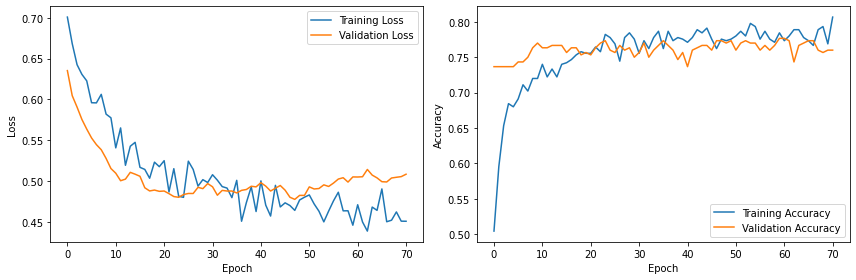

In [53]:
import matplotlib.pyplot as plt

# Ambil hasil pelatihan model (misalnya, dari variabel history)
history =model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_split=0.4, callbacks=[custom_callback])

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()


In [54]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

 1/24 [>.............................] - ETA: 0s - loss: 0.5067 - accuracy: 0.6250

24/24 [==============================] - 0s 998us/step - loss: 0.5065 - accuracy: 0.7453
Loss: 0.5065123438835144, Accuracy: 0.7453333139419556


In [55]:
# Prediksi pada data uji
predictions = model.predict(X_test_scaled)

24/24 [==============================] - 0s 781us/step
